In [60]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [61]:
# Fetch Bitcoin data from Yahoo Finance
#bitcoin_data = yf.download('BTC-USD', start='2023-01-01', end='2024-01-01')
bitcoin_data = yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [62]:
# Calculate daily returns
bitcoin_data['Returns'] = bitcoin_data['Close'].pct_change()

In [63]:
# Add a column for the day of the week (0 = Monday, 1 = Tuesday, ..., 6 = Sunday)
bitcoin_data['Day_of_Week'] = bitcoin_data.index.dayofweek

# Group by day of the week and calculate average returns
average_returns_by_day = bitcoin_data.groupby('Day_of_Week')['Returns'].mean()



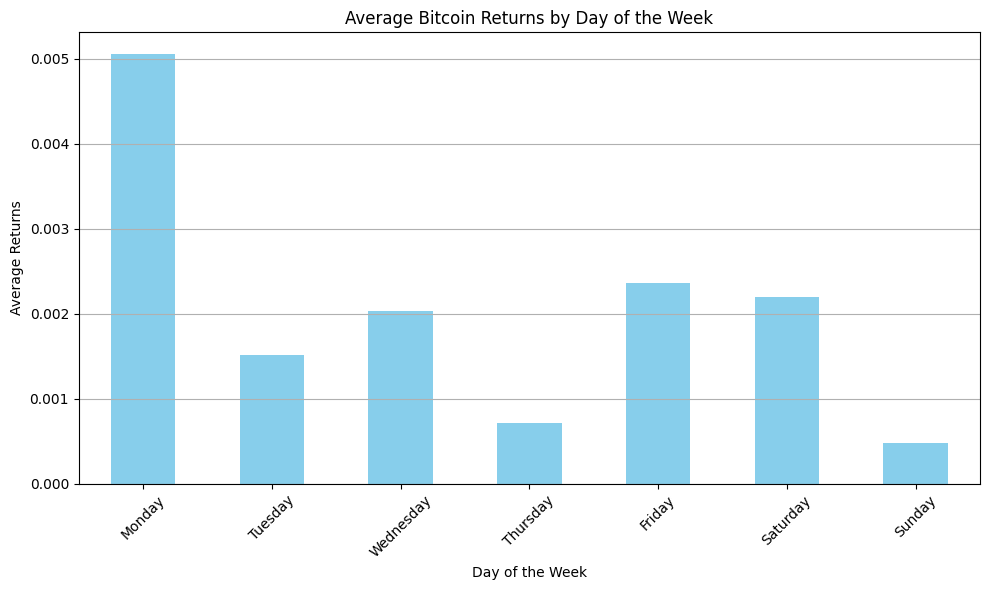

In [64]:
# Create a plot
plt.figure(figsize=(10, 6))
average_returns_by_day.plot(kind='bar', color='skyblue')

# Customize the plot
plt.title('Average Bitcoin Returns by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Returns')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

In [65]:
# Filter only Mondays
mondays_data = bitcoin_data[bitcoin_data.index.dayofweek == 0]

# Initialize variables
total_profit = 0
total_trades = 0

# Perform backtest
for index, row in mondays_data.iterrows():
    # Buy at open price
    buy_price = row['Open']
    
    # Find the corresponding closing price
    close_price = bitcoin_data.loc[index, 'Close']
    
    # Calculate profit
    profit = close_price - buy_price
    
    # Accumulate total profit and total trades
    total_profit += profit
    total_trades += 1

# Print results
print("Total Profit from Monday Open to Close Trades:", round(total_profit, 2))
print("Total Number of Trades:", total_trades)


Total Profit from Monday Open to Close Trades: 17365.62
Total Number of Trades: 491
